<a href="https://colab.research.google.com/github/halemitch/DS-4002-Project1/blob/main/DS_4002_MI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the file that contains all of the code for our project. It starts with reading in the data, performing an EDA, and then cleaning the data. Lastly, we create our logistic regression model

**You might have to run this first block multiple times. The data is easily corruptable and the runtime will frequently stop. If it still doesn't work after a few tries, you can uncomment out the second code chunk that handles the error to get a subset of the data.**


In [ ]:
# Code given to us where we downloaded the data
import pandas as pd
import gzip
import json

# Parses the Data
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

# Reads in the data and puts it into a data frame
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')
  if buf == b"":
    print("retrying")
    getDF(path)

df = getDF('Pet_Supplies_5.json.gz')

In [ ]:
# Uncomment out this chunk if above chunk doesn't work to load in the data ****
#Code given to us where we downloaded the data
# import pandas as pd
# import gzip
# import json

# #Parses the Data
# def parse(path):
#     # try:
#     #     #open in text mode
#     #     with gzip.open(path, 'rt', encoding='utf-8') as g:
#     #         for l in g:
#     #             try:
#     #               #added part because error sometimes occurred
#     #                 yield json.loads(l)
#     #             except json.JSONDecodeError:
#     #                 #skip any bad line if the file is truncated
#     #                 continue
#     # except EOFError:
#     #     #handle the case where gzip ends early
#     #     getDF('Pet_Supplies_5.json.gz')
#     #     print("Warning: file ended unexpectedly. Parsed what was available.")

#     g = gzip.open(path, 'rb')
#     for l in g:
#     yield json.loads(l)

# #Reads in the data and puts it into a data frame
# def getDF(path):
#   i = 0
#   df = {}
#   for d in parse(path):
#     df[i] = d
#     i += 1
#   return pd.DataFrame.from_dict(df, orient='index')

# #puts the data from the file into the variable df
# df = getDF('Pet_Supplies_5.json.gz')

In [ ]:
df

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,3.0,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,NaN,NaN
1,3.0,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,NaN,NaN
2,5.0,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,NaN,NaN
3,3.0,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,NaN,NaN
4,2.0,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2098320,4.0,NaN,True,"06 1, 2018",A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,1527811200,"{'Style:': ' 1 Box, 30 Packets'}",NaN
2098321,4.0,NaN,True,"11 26, 2017",A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,1511654400,NaN,NaN
2098322,5.0,NaN,True,"09 21, 2017",A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,1505952000,NaN,NaN
2098323,4.0,NaN,True,"06 16, 2017",A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",1497571200,NaN,NaN


In [ ]:
#Selected the desired columns
selectedCols = df[['overall', 'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'reviewText', 'summary']]

#Renamed the columns we wanted
renamedCols = selectedCols.rename(columns={'overall': 'Rating', 'reviewTime': 'Date', 'asin': 'Product_ID', 'reviewText': 'Review',
                             'summary': 'Summary_Review', 'reviewerID': 'Reviewer_ID', 'reviewerName': 'Reviewer_Name'})

In [ ]:
#Makes the columns with the ratings
renamedCols['Rating_Bucket'] = pd.cut(renamedCols['Rating'], bins=[0, 1, 2, 3, 4, 5], labels=['Not Good', 'Not Good', 'Not Good', 'Good', 'Good'], ordered = False)

In [ ]:
# Export the DataFrame to a CSV file
renamedCols.to_csv('pet_supplies_reviews.csv', index=False)

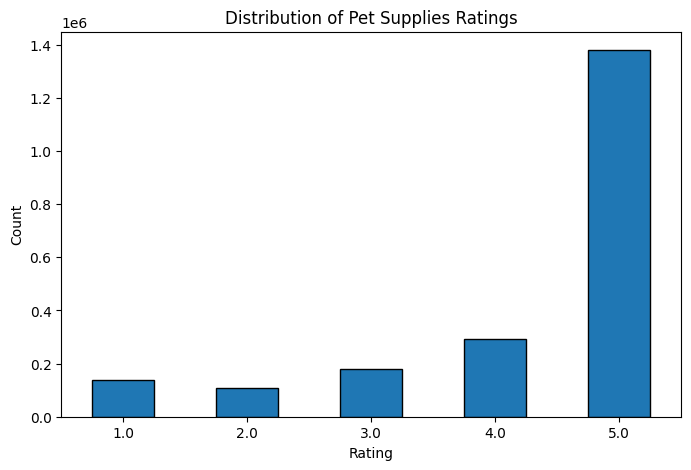

In [ ]:
#creates our first EDA plot
import matplotlib.pyplot as plt

# Barplot of Rating counts
renamedCols['Rating'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(8,5),
    edgecolor="black"
)

#changes title, axes labels, and saves the picture
plt.title("Distribution of Pet Supplies Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig('rating_distribution.png')
plt.show()


In [ ]:
#coerces the date column to datetime values
renamedCols['Date'] = pd.to_datetime(renamedCols['Date'], errors='coerce')

In [ ]:
#makes sure there are no errors in the data column after coersion
num_errors = renamedCols['Date'].isna().sum()
print("Number of errors:", num_errors)

Number of errors: 0


In [ ]:
#checking if python converted the times properly
print(renamedCols['Date'].head(10))
print(renamedCols['Date'].tail(10))

0   2016-12-02
1   2016-10-17
2   2016-09-09
3   2016-08-31
4   2016-08-18
5   2016-07-17
6   2015-12-04
7   2015-03-27
8   2015-03-04
9   2015-01-13
Name: Date, dtype: datetime64[ns]
2098315   2017-10-06
2098316   2017-05-29
2098317   2017-04-30
2098318   2018-09-29
2098319   2018-08-17
2098320   2018-06-01
2098321   2017-11-26
2098322   2017-09-21
2098323   2017-06-16
2098324   2017-05-04
Name: Date, dtype: datetime64[ns]


In [ ]:
print("Earliest date:", renamedCols['Date'].min())
print("Latest date:", renamedCols['Date'].max())

Earliest date: 2001-12-31 00:00:00
Latest date: 2018-10-02 00:00:00


/tmp/ipython-input-1749191800.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reviews_over_time = renamedCols.resample('M', on='Date').size()


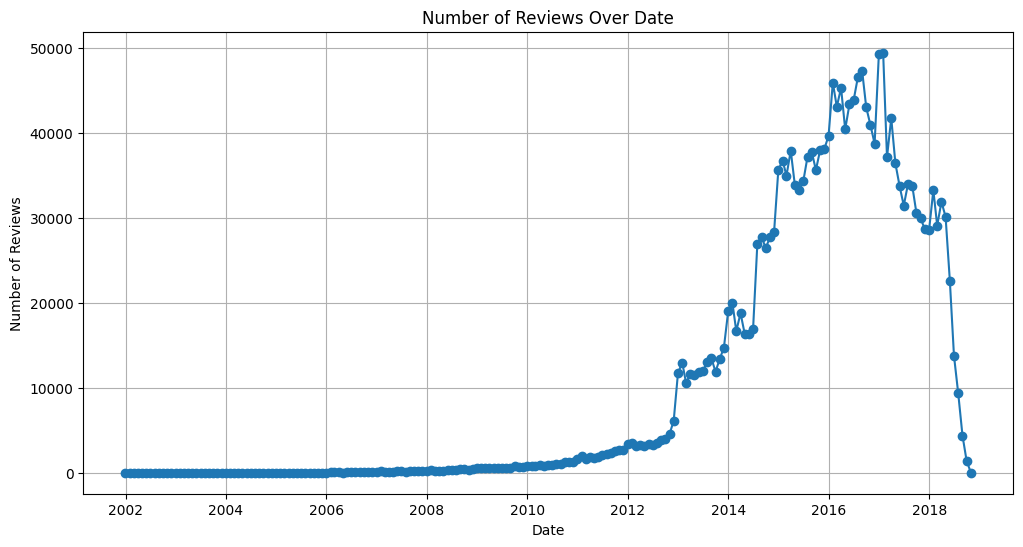

In [ ]:
#Creates another EDA plot that shows number of ratings over time
import matplotlib.pyplot as plt

# Make sure Time is datetime
renamedCols['Date'] = pd.to_datetime(renamedCols['Date'], errors='coerce')

# Group by month and count reviews
reviews_over_time = renamedCols.resample('M', on='Date').size()

# Plot line graph
plt.figure(figsize=(12,6))
plt.plot(reviews_over_time.index, reviews_over_time.values, marker='o')

#creates title and axis labels
plt.title("Number of Reviews Over Date")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

/tmp/ipython-input-1724902174.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Month', 'Rating_Bucket'])


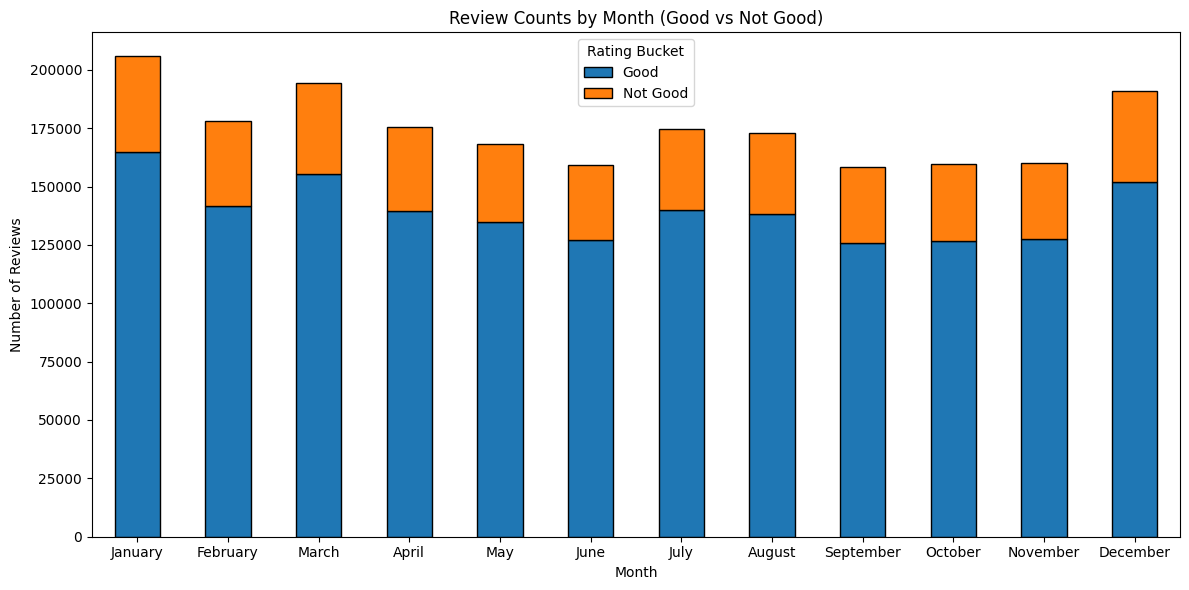

In [ ]:
#creates stacked bar plot that shows the good/not good ratings per month
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Ensure datetime
renamedCols['Date'] = pd.to_datetime(renamedCols['Date'], errors='coerce')

# Month-of-year (ordered Jan..Dec)
renamedCols['Month'] = pd.Categorical(
    renamedCols['Date'].dt.month_name(),
    categories=list(calendar.month_name)[1:],  # ['January', ..., 'December']
    ordered=True
)

# Counts per month x Rating_Bucket
monthly_counts = (
    renamedCols
      .groupby(['Month', 'Rating_Bucket'])
      .size()
      .unstack(fill_value=0)
      .reindex(list(calendar.month_name)[1:])   # keep Jan..Dec order
)

# Stacked bar (12 ticks)
ax = monthly_counts.plot(kind='bar', stacked=True, figsize=(12,6), edgecolor="black")
ax.set_title("Review Counts by Month (Good vs Not Good)")
ax.set_xlabel("Month")
ax.set_ylabel("Number of Reviews")
ax.legend(title="Rating Bucket")
ax.set_xticklabels(monthly_counts.index, rotation=0)
plt.tight_layout()
plt.savefig('over_months.png')
plt.show()


In [ ]:
renamedCols

,Rating,Date,Reviewer_ID,Product_ID,Reviewer_Name,Review,Summary_Review,Rating_Bucket,Month
0,3.0,2016-12-02,A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,Not Good,December
1,3.0,2016-10-17,A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,Not Good,October
2,5.0,2016-09-09,AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,Good,September
3,3.0,2016-08-31,A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,Not Good,August
4,2.0,2016-08-18,A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,Not Good,August
...,...,...,...,...,...,...,...,...,...
2098320,4.0,2018-06-01,A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,Good,June
2098321,4.0,2017-11-26,A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,Good,November
2098322,5.0,2017-09-21,A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,Good,September
2098323,4.0,2017-06-16,A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",Good,June


In [ ]:
# Get all rows with at least one missing value
missing_rows = renamedCols[renamedCols.isnull().any(axis=1)]

# Show how many rows
print("Number of rows with missing data:", len(missing_rows))

# Display the rows (or the first few)
missing_rows.head()

Number of rows with missing data: 1117


,Rating,Date,Reviewer_ID,Product_ID,Reviewer_Name,Review,Summary_Review,Rating_Bucket,Month
3602,5.0,2017-07-29,A3F52XJJJWAC8,B00006H36X,Lisa Marie,NaN,Five Stars,Good,July
10075,5.0,2017-01-21,AMBB13YT9F9WW,B000084F3T,NaN,I got a bigger cat box because I have a big ca...,Good price and a fast ship,Good,January
14808,5.0,2017-02-06,A5AZJBFPGPL73,B000084EEF,P.J.,The cats adore these..especially when we are c...,NaN,Good,February
16920,5.0,2016-06-08,AWZWC9S5X5CBE,B000084EEF,healing touch,NaN,My kitty loved it!! If allowed I would have po...,Good,June
17877,5.0,2015-10-26,A1UQ648306TXFB,B000084EEF,Wei Chi,NaN,Five Stars,Good,October


In [ ]:
#percentage of rows witha  missing value
per=len(missing_rows)/len(renamedCols)
print(per*100)

0.05323293579402619


In [ ]:
#number of rows with a missing value
final_no_rows=len(renamedCols)-len(missing_rows)
print(final_no_rows)

2097208


In [ ]:
# Data Cleaning - MI3
import re, string

# Make copy so original `renamedCols` remains unchanged for prior analyses/plots
clean = renamedCols.copy()

# 1) Drop rows with missing/blank review comments
clean['Review'] = clean['Review'].astype(str)
clean['Review'] = clean['Review'].replace(r'^\s*$', pd.NA, regex=True)
clean = clean.dropna(subset=['Review'])

# 2) Standardize review comments: convert to lowercase, strip punctuation, remove whitespace
def _normalize_text(s: str) -> str:
    s = s.lower()
    s = s.translate(str.maketrans('', '', string.punctuation))
    s = re.sub(r'\s+', ' ', s).strip()
    return s

clean['review_clean'] = clean['Review'].map(_normalize_text)

# Remove any rows that became empty after cleaning
clean = clean[clean['review_clean'].str.len() > 0].copy()

# 3) Remove duplicate reviews (by Product + Reviewer + cleaned text)
dedup_keys = [k for k in ['Product_ID', 'Reviewer_ID', 'review_clean'] if k in clean.columns]
clean = clean.drop_duplicates(subset=dedup_keys)

# 4) Make sure Rating_Bucket exists on the cleaned dataset also
if 'Rating_Bucket' not in clean.columns:
    clean['Rating_Bucket'] = pd.cut(
        clean['Rating'],
        bins=[0, 1, 2, 3, 4, 5],
        labels=['Not Good', 'Not Good', 'Not Good', 'Good', 'Good'],
        ordered=False,
        include_lowest=True
    )

print(f"Original rows (renamedCols): {len(renamedCols)}")
print(f"After cleaning (clean): {len(clean)}")

# 5) Export a cleaned CSV (keeps other original export below intact)
clean.to_csv('pet_supplies_reviews_cleaned.csv', index=False)

Original rows (renamedCols): 2098325
After cleaning (clean): 1971419


In [ ]:
clean

,Rating,Date,Reviewer_ID,Product_ID,Reviewer_Name,Review,Summary_Review,Rating_Bucket,Month,review_clean
0,3.0,2016-12-02,A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,Not Good,December,i purchased this cd for my pocket parrot it ha...
1,3.0,2016-10-17,A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,Not Good,October,maybe its just my amazon parrot but shes not p...
2,5.0,2016-09-09,AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,Good,September,i bought this to help me teach my blue quaker ...
3,3.0,2016-08-31,A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,Not Good,August,bird showed no interest in it
4,2.0,2016-08-18,A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,Not Good,August,didnt do a thing for my african grey he hated ...
...,...,...,...,...,...,...,...,...,...,...
2098320,4.0,2018-06-01,A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,Good,June,it did no harm but hard to see any improvement...
2098321,4.0,2017-11-26,A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,Good,November,these are not rounded i bought them for my lit...
2098322,5.0,2017-09-21,A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,Good,September,my destroyer french bulldog was not able to de...
2098323,4.0,2017-06-16,A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",Good,June,this is one of my dogs favorite toys but all t...


Dataset has been cleaned and exported into a csv to work with the cleaned dataset whenever we want


In [ ]:
cleaned_dataset=pd.read_csv('pet_supplies_reviews_cleaned.csv')

In [ ]:
cleaned_dataset

,Rating,Date,Reviewer_ID,Product_ID,Reviewer_Name,Review,Summary_Review,Rating_Bucket,Month,review_clean
0,3.0,2016-12-02,A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,Not Good,December,i purchased this cd for my pocket parrot it ha...
1,3.0,2016-10-17,A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,Not Good,October,maybe its just my amazon parrot but shes not p...
2,5.0,2016-09-09,AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,Good,September,i bought this to help me teach my blue quaker ...
3,3.0,2016-08-31,A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,Not Good,August,bird showed no interest in it
4,2.0,2016-08-18,A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,Not Good,August,didnt do a thing for my african grey he hated ...
...,...,...,...,...,...,...,...,...,...,...
1971414,4.0,2018-06-01,A2BWOAJ5KSAL4C,B01HIQ9NGU,TexasHonda,"It did no harm, but hard to see any improvemen...",Four Stars,Good,June,it did no harm but hard to see any improvement...
1971415,4.0,2017-11-26,A1X0IOOF3J0OXB,B01HIV7FC4,Pamela Mathers,These are not rounded. I bought them for my li...,Read description carefully.,Good,November,these are not rounded i bought them for my lit...
1971416,5.0,2017-09-21,A3UCIDW3BYEGB1,B01HIV7FC4,pterri,My destroyer French Bulldog was not able to de...,Sturdy Squeaker,Good,September,my destroyer french bulldog was not able to de...
1971417,4.0,2017-06-16,A2JO0GAAKLQ0SH,B01HIV7FC4,Erik,"This is one of my dog's favorite toys, but all...","Dog loves it, but the squeakers don't last",Good,June,this is one of my dogs favorite toys but all t...


In [ ]:
# Logistic regression model creation

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1) Features/labels straight from cleaned_dataset
X = cleaned_dataset["review_clean"].astype(str)
y = cleaned_dataset["Rating_Bucket"].astype(str)   # "Good" / "Not Good"

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Pipeline: TF-IDF → Logistic Regression
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        lowercase=True,
        stop_words="english",
        ngram_range=(1,2),
        min_df=5,
        max_df=0.9,
        strip_accents="unicode",
        sublinear_tf=True
    )),
    ("logreg", LogisticRegression(
        max_iter=300,
        class_weight="balanced",
        solver="liblinear"
    ))
])

# 4) Train
pipe.fit(X_train, y_train)

# # 5) Evaluate
# y_pred = pipe.predict(X_test)
# print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))

# # ROC-AUC (treat "Good" as positive)
# proba = pipe.predict_proba(X_test)[:, pipe.classes_.tolist().index("Good")]
# print("ROC-AUC (Good vs Not Good):", roc_auc_score((y_test=="Good").astype(int), proba))

# # 6) Top predictive words/phrases
# tfidf = pipe.named_steps["tfidf"]
# logreg = pipe.named_steps["logreg"]
# feature_names = tfidf.get_feature_names_out()
# coefs = logreg.coef_[0]

# top_k = 25
# top_pos_idx = np.argsort(coefs)[-top_k:][::-1]
# top_neg_idx = np.argsort(coefs)[:top_k]

# print("\nTop predictors of 'Good':")
# for i in top_pos_idx:
#     print(f"{feature_names[i]:<30} {coefs[i]: .3f}")

# print("\nTop predictors of 'Not Good':")
# for i in top_neg_idx:
#     print(f"{feature_names[i]:<30} {coefs[i]: .3f}")


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1, 2),
                                 stop_words='english', strip_accents='unicode',
                                 sublinear_tf=True)),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=300,
                                    solver='liblinear'))])

In [ ]:
# continuation of the model

y_pred = pipe.predict(X_test)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

report = classification_report(y_test, y_pred, digits=3, output_dict=True)

print("\nPerformance by class:")
for label in ["Good", "Not Good"]:
    print(f"{label:>8} → "
          f"Precision: {report[label]['precision']:.3f}, "
          f"Recall: {report[label]['recall']:.3f}, "
          f"F1: {report[label]['f1-score']:.3f}, "
          f"Support: {int(report[label]['support'])}")

print("\nAccuracy:", report["accuracy"])

# ROC-AUC (treat 'Good' as positive class)
good_index = pipe.named_steps["logreg"].classes_.tolist().index("Good")
proba_good = pipe.predict_proba(X_test)[:, good_index]
print("ROC-AUC (Good vs Not Good):", roc_auc_score((y_test == "Good").astype(int), proba_good))

tfidf = pipe.named_steps["tfidf"]
logreg = pipe.named_steps["logreg"]

feature_names = tfidf.get_feature_names_out()
coefs = logreg.coef_[0].copy()

# Make positive weights = 'Good'
classes = logreg.classes_
if classes[1] != "Good":
    coefs = -coefs  # flip so positives mean 'Good'

top_k = 25
top_good_idx = np.argsort(coefs)[-top_k:][::-1]   # largest → 'Good'
top_bad_idx  = np.argsort(coefs)[:top_k]          # most negative → 'Not Good'

print("\nTop predictors of 'Good':")
for i in top_good_idx:
    print(f"{feature_names[i]:<30} {coefs[i]: .3f}")

print("\nTop predictors of 'Not Good':")
for i in top_bad_idx:
    print(f"{feature_names[i]:<30} {coefs[i]: .3f}")

Confusion matrix:
 [[276717  37730]
 [ 11645  68192]]

Performance by class:
    Good → Precision: 0.960, Recall: 0.880, F1: 0.918, Support: 314447
Not Good → Precision: 0.644, Recall: 0.854, F1: 0.734, Support: 79837

Accuracy: 0.8747730062594475
ROC-AUC (Good vs Not Good): 0.9396699942454898

Top predictors of 'Good':
loves                           18.331
love                            16.596
perfect                         14.757
highly recommend                12.710
excellent                       11.440
great                           10.805
amazing                         10.760
awesome                         10.212
fantastic                       9.445
definitely recommend            9.187
perfectly                       9.018
wasnt sure                      8.999
wonderful                       8.973
wont disappointed               8.835
best                            8.779
glad                            8.380
highly                          8.292
saved                   

**A brief interpretation of the results I got:**
- Overall Accuracy of the model - 88%
- ROC-AUC - 0.94, excellent separation between Good vs Not Good
- F1 score 'Good' - 0.92
- F1 score 'Not Good' - 0.73
The main reason for this low F1 score (mainly precision) for the 'Not Good' bucket is due to the imbalance in the dataset (significantly more 'Good' reviews compared to 'Not good)
